In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [6]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [7]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\faisa\OneDrive\Desktop\Assignment2_ML


In [8]:
df = pd.read_csv('hour.csv')
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We load the dataset `hour.csv` which contains hourly bike rental data for 2011 and 2012. Each row represents an hour, and the target variable is `cnt` representing the total number of bike rentals. The first few rows are displayed to confirm the file was loaded correctly and to get an initial sense of the data.


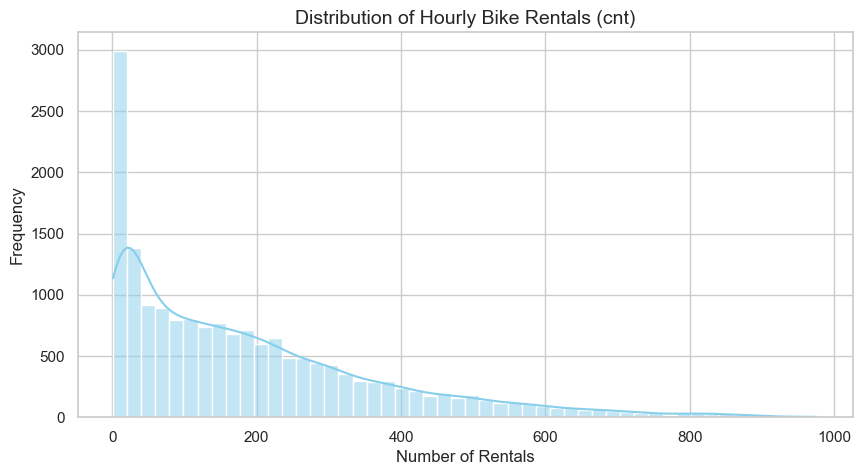

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Hourly Bike Rentals (cnt)', fontsize=14)
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

In [10]:
skewness = df['cnt'].skew()
print(f"Skewness of 'cnt': {skewness:.2f}")

Skewness of 'cnt': 1.28


As you can see the distribution of the target variable 'cnt' which is basically the number of hourly bike rentals, is right skewed as also indicated by the skewness which is 1.28. This means that most rental counts are relatively low, and with fewer recordings very high rental counts. As there can be high demand especially in busy hours. The skewness is important here as it can help you find either extreme values or outliers.

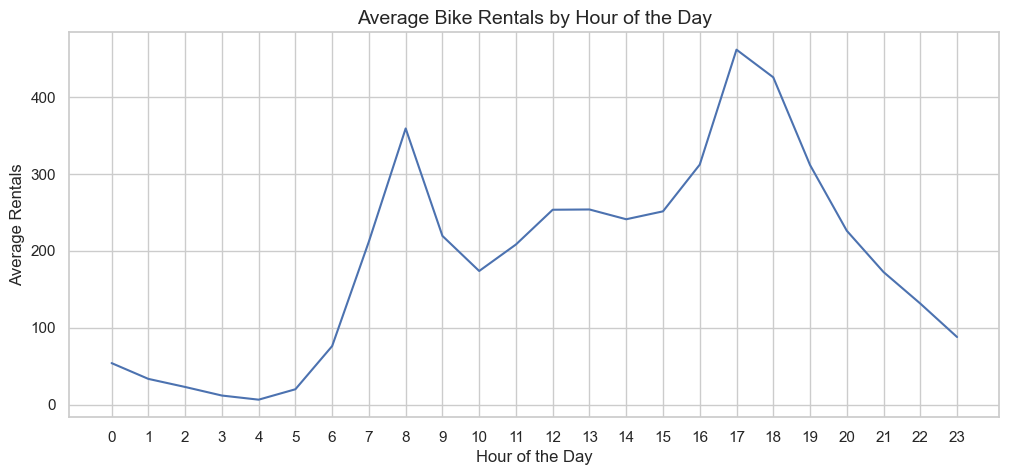

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt')
plt.title('Average Bike Rentals by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

This line above plot shows the average number of bike rentals by hour of the day. As we can see from it we can abserve two things which are: The morning peak (around 8 am) which likely corresponds to going to work and then the evening peak (5-6 pm) which corresponds with the end of the workday were people are going home. These reflects the impact of daily human routines to rent bikes and the hours is a clearly strong predictive feature.

C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\1338032292.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', estimator='mean', ci=None, palette='pastel')
C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\1338032292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', estimator='mean', ci=None, palette='pastel')


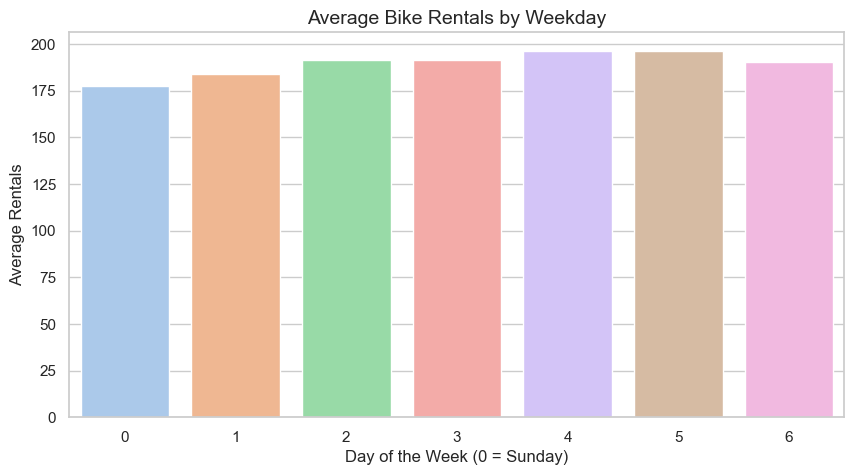

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='weekday', y='cnt', estimator='mean', ci=None, palette='pastel')
plt.title('Average Bike Rentals by Weekday', fontsize=14)
plt.xlabel('Day of the Week (0 = Sunday)')
plt.ylabel('Average Rentals')
plt.show()

This bar chart represents the average bike rentals for each day where 0 represents Sunday and 6 represents Saturday. And as we can see that the bike rentals are slightly lower on Sundays and increase throughout the week, this reflects that during the workweek people are more likely to rent bikes. Also the rise on Friday and Saturday might also idicate increased recreational use.

C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\683285537.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='season', y='cnt', estimator='mean', ci=None, palette='Set2')
C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\683285537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='cnt', estimator='mean', ci=None, palette='Set2')


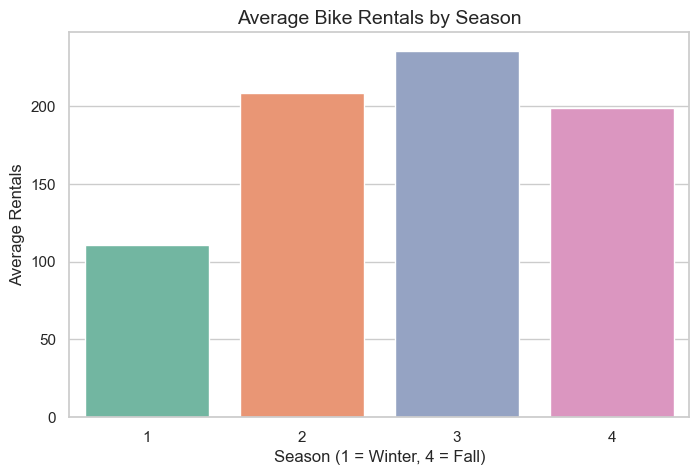

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='season', y='cnt', estimator='mean', ci=None, palette='Set2')
plt.title('Average Bike Rentals by Season', fontsize=14)
plt.xlabel('Season (1 = Winter, 4 = Fall)')
plt.ylabel('Average Rentals')
plt.show()

I did this bar chart to show the average number of bike rentals for each season. As you can see, the Summer and Spring have the highest rentals counts, Winter shows the lowest as it might be because of the cold weather and in Fall is a bit less than Summer but still more users than Winter

C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\2866277236.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='mnth', y='cnt', estimator='mean', ci=None, palette='coolwarm')
C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\2866277236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='mnth', y='cnt', estimator='mean', ci=None, palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

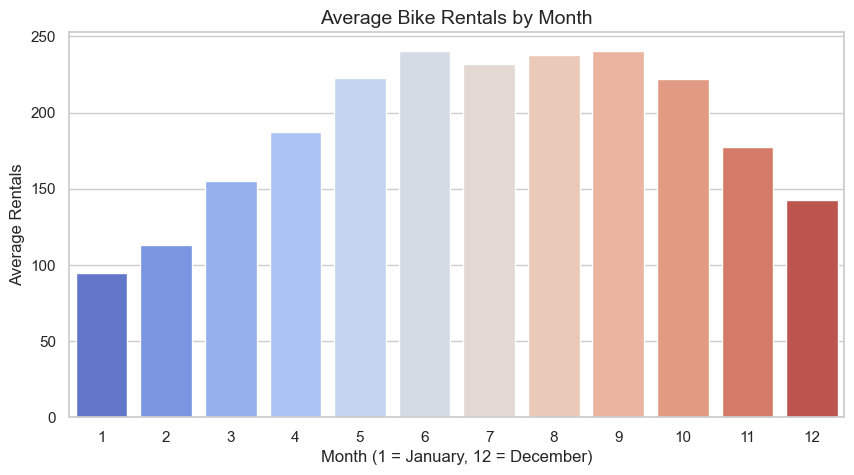

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='mnth', y='cnt', estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Bike Rentals by Month', fontsize=14)
plt.xlabel('Month (1 = January, 12 = December)')
plt.ylabel('Average Rentals')
plt.show

This bar chart shows the monthly average of bike rentals. The rate of rentals increased from January through September and had its maximum numbers in late Summer and then dropped again after (in October).

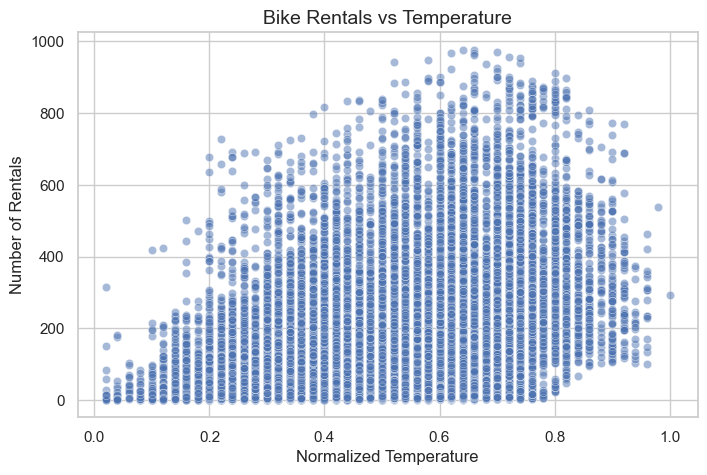

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5)
plt.title('Bike Rentals vs Temperature', fontsize=14)
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Rentals')
plt.show()

This is a scatter plot show the relationship between the temperature  and bike rentals. It shows a positive correlation between them, meaning as the temperature increases the number of bike rentals increases having its highest around 0.6 to 0.8, then after this temperature there is a bit of a decline. This is a strong feature for predictions in this model.

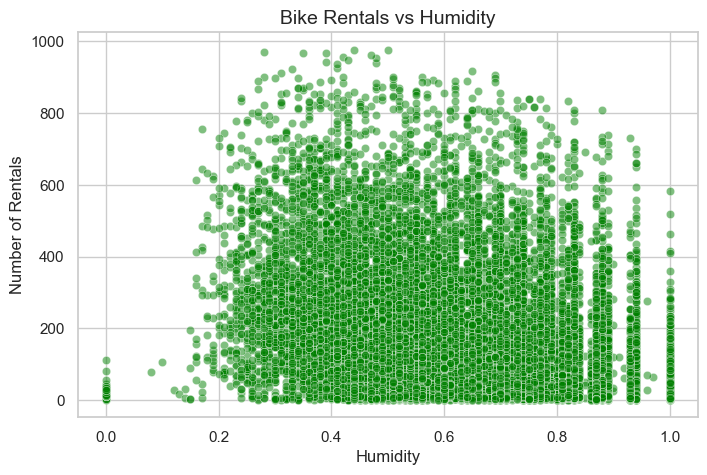

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='hum', y='cnt', alpha=0.5, color='green')
plt.title('Bike Rentals vs Humidity', fontsize=14)
plt.xlabel('Humidity')
plt.ylabel('Number of Rentals')
plt.show()

This scatter plot shows the relationship between bike rentals and humidity, rentals tend to decrease at high humidity levels. There's greater variability at mid-range humidity (0.2 to 0.6) then the number decreases as the humidity gets above 0.8, indicating it may not be a strong s predictor as the relationship is waker than with the temperature.

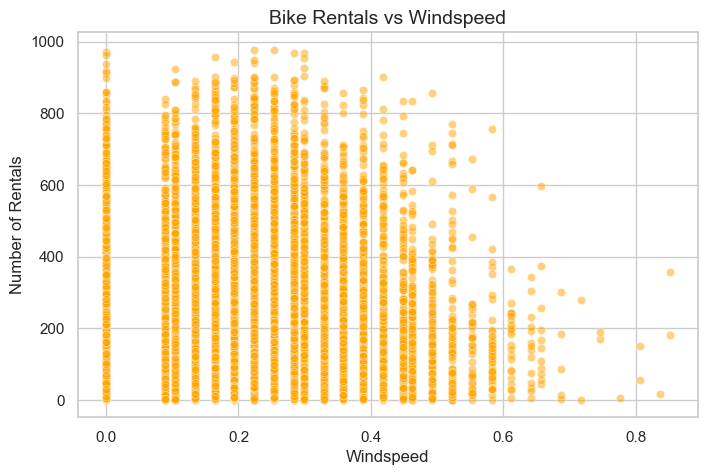

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='windspeed', y='cnt', alpha=0.5, color='orange')
plt.title('Bike Rentals vs Windspeed', fontsize=14)
plt.xlabel('Windspeed')
plt.ylabel('Number of Rentals')
plt.show()

This scatterplot shows how windspeed affects the bike rentals, at lower wind speeds below 0.3, rentals are generally high, but as the windspeed increases the number of rentals starts to drop, as wind speed that is higher than 0.6 there are very few rentals. This suggests there is a strong but inversly proportional relationship between between the ind and the bike rentals, but still not as strong as the temperature.

C:\Users\faisa\AppData\Local\Temp\ipykernel_15084\3889495211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weathersit', y='cnt', palette='Set3')


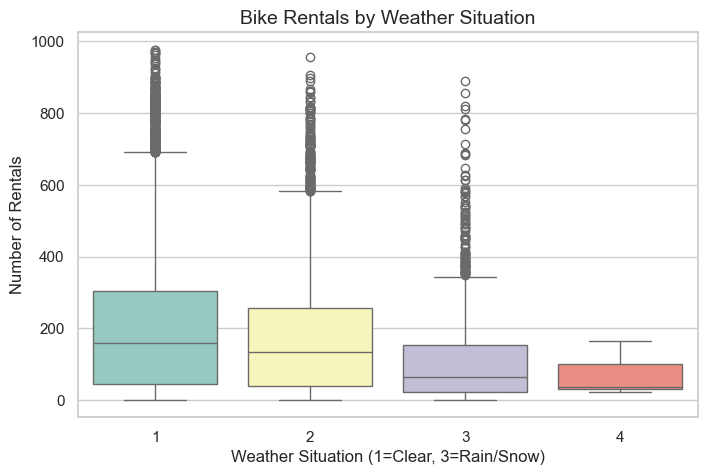

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='weathersit', y='cnt', palette='Set3')
plt.title('Bike Rentals by Weather Situation', fontsize=14)
plt.xlabel('Weather Situation (1=Clear, 3=Rain/Snow)')
plt.ylabel('Number of Rentals')
plt.show()

This boxplot shows how bike rentals vary across different weather situations. Weather 1 has the highest median, it might mean that it has fewer clouds and clear sky and also widest spread in rental counts. In weather 2, it is cloudy. In weather 3, it has some rain and snow and shows a noticeable drop in rental numbers and in weather 4 there is heavy rain and shows very rare bike rentals. This confirms that bad weather significantly reduces bike usage.

TASK 2

In [20]:
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
print("Train shape:", train_df.shape)
print("Temp shape (val+test):", temp_df.shape)

Train shape: (10427, 17)
Temp shape (val+test): (6952, 17)


In [21]:
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Validation shape: (3476, 17)
Test shape: (3476, 17)


In [22]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

 I decided  to split the dataset into three parts to prevent data leakage and ensure fair model evaluation.I used `train_test_split` to first separate 60% of the data for training, and then split the remaining 40% evenly into validation and test sets 20% each.


TASK 3

In [25]:

def add_cyclical_features(df):
    # Hour of day (0–23)
    df['hr_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['hr_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    # Month of year (1–12)
    df['mnth_sin'] = np.sin(2 * np.pi * df['mnth'] / 12)
    df['mnth_cos'] = np.cos(2 * np.pi * df['mnth'] / 12)
    # Day of week (0–6)
    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

    return df

In [26]:
train_df = add_cyclical_features(train_df)
val_df = add_cyclical_features(val_df)
test_df = add_cyclical_features(test_df)

I transformed the time-related features `hr`, `mnth`, and `weekday` into cyclical features using sine and cosine functions. This helps the model understand the circular nature of these values.I created two new columns one for sin and one for cos, and applied the transformation to the training, validation, and test sets.


In [27]:
categorical_cols = ['season', 'weathersit']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
val_df = pd.get_dummies(val_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)


In this step I applied one hot encoding to both season and weathersit. This means that each unique value in the columns was converted into a seperate binary column so either 0 or 1.

In [29]:
cols_to_drop = ['hr', 'mnth', 'weekday']
train_df = train_df.drop(columns=cols_to_drop)
val_df = val_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

The original columns were dropped from the training, validation and tests sets to avoid redundancy and make sure the we only use the encoded version.

In [30]:
corr = train_df[['temp', 'atemp']].corr()
print(corr)


          temp    atemp
temp   1.00000  0.98968
atemp  0.98968  1.00000


Since the correlation between temp and atemp is pretty high and nearly 1, I believe that they give us the same data so I am going to drop atemp so I can make things less complicated for me.

In [31]:
train_df = train_df.drop(columns=['atemp'])
val_df = val_df.drop(columns=['atemp'])
test_df = test_df.drop(columns=['atemp'])

TASK 4

In [33]:
target = 'cnt'
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_val = val_df.drop(columns=[target])
y_val = val_df[target]

In [35]:
X_train = X_train.drop(columns=['dteday'])
X_val = X_val.drop(columns=['dteday'])

I used ChatGPT for this as it kept giving me an error so I used dteday.

In [36]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [40]:
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [41]:
y_pred = lr_model.predict(X_val)

In [42]:
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [45]:
print("Linear Regression Performance on Validation Set:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance on Validation Set:
MSE: 0.00
MAE: 0.00
R² Score: 1.0000


In [44]:
X_train = train_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_train = train_df['cnt']

X_val = val_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_val = val_df['cnt']


In [46]:
print(train_df.iloc[0])
print(val_df.iloc[0])

instant               3220
dteday          2011-05-19
yr                       0
holiday                  0
workingday               1
temp                   0.5
hum                   0.94
windspeed              0.0
casual                   2
registered               4
cnt                      6
hr_sin            0.258819
hr_cos            0.965926
mnth_sin               0.5
mnth_cos         -0.866025
weekday_sin      -0.433884
weekday_cos      -0.900969
season_2              True
season_3             False
season_4             False
weathersit_2         False
weathersit_3         False
weathersit_4         False
Name: 0, dtype: object
instant               4857
dteday          2011-07-26
yr                       0
holiday                  0
workingday               1
temp                  0.68
hum                   0.83
windspeed           0.2239
casual                   2
registered             108
cnt                    110
hr_sin                 1.0
hr_cos                 0.0
mnth_

In [47]:
print(X_train.equals(X_val))

False


In [48]:
print(X_train.head(1))
print(X_val.head(1))

   instant  yr  holiday  workingday  temp   hum  windspeed    hr_sin  \
0     3220   0        0           1   0.5  0.94        0.0  0.258819   

     hr_cos  mnth_sin  mnth_cos  weekday_sin  weekday_cos  season_2  season_3  \
0  0.965926       0.5 -0.866025    -0.433884    -0.900969      True     False   

   season_4  weathersit_2  weathersit_3  weathersit_4  
0     False         False         False         False  
   instant  yr  holiday  workingday  temp   hum  windspeed  hr_sin  \
0     4857   0        0           1  0.68  0.83     0.2239     1.0   

         hr_cos  mnth_sin  mnth_cos  weekday_sin  weekday_cos  season_2  \
0  6.123234e-17      -0.5 -0.866025     0.974928    -0.222521     False   

   season_3  season_4  weathersit_2  weathersit_3  
0      True     False         False         False  


In [50]:
val_df = val_df.reindex(columns=train_df.columns, fill_value=0)
X_train = train_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_train = train_df['cnt']
X_val = val_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_val = val_df['cnt']

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr_model.predict(X_val)

In [53]:
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [54]:
print("Linear Regression Performance on Validation Set:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance on Validation Set:
MSE: 15885.91
MAE: 92.16
R² Score: 0.5112


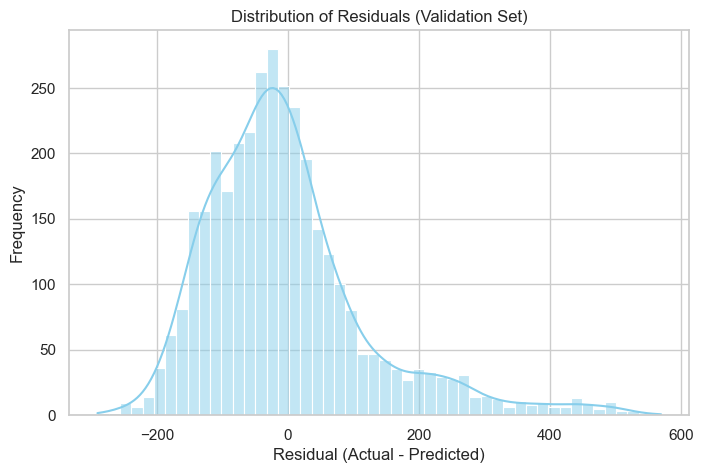

In [55]:
residuals = y_val - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

I trained a Linear Regression model to predict the number of hourly bike rentals which is cnt. I made sure I removed any column that could cause data leakage so to clean up i removed casual, registered,dteday and the target cnt. I faced a lot of problems in this task, as I got an MSE of 0 and R^2 of 1, which does not make any sense. So I had to do everything again and also I had this problem because of how I used one hot encoding as I encoded for each one seperately. I solved this problem by reapplying one hot encoding only on training and the validation sets. I also dropped all the leakge columns again and trained the model properly anf finally the leakage was fixed.

TASK 5

In [57]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

In [58]:
mse_dt = mean_squared_error(y_val, y_pred_dt)
mae_dt = mean_absolute_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)

In [59]:
print("Decision Tree Performance on Validation Set:")
print(f"MSE: {mse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")

Decision Tree Performance on Validation Set:
MSE: 3563.72
MAE: 34.25
R² Score: 0.8903


Using the data I cleaned, I trained and imported the DecisionTreeRegressor, then I made predictions on the X_val and evaluated my model again with MSE, MAE AND R^2 and as you can see here the error is much lower than the error in the linear regression so this is better.

In [61]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred_rf = rf_model.predict(X_val)

In [63]:
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

In [64]:
print("Random Forest Performance on Validation Set:")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Performance on Validation Set:
MSE: 1765.65
MAE: 24.83
R² Score: 0.9457


I decided to use the Random Forest Perforemance as it is simple and fast it also reduces the risk of overfitting, this means it leads to lower error and higher R^2 as we can in the results, so until now the Random Forest Performance is the best as it is the more accurate with the highest R^2.

In [65]:
importances = rf_model.feature_importances_
features = X_train.columns

In [66]:
indices = np.argsort(importances)[::-1]

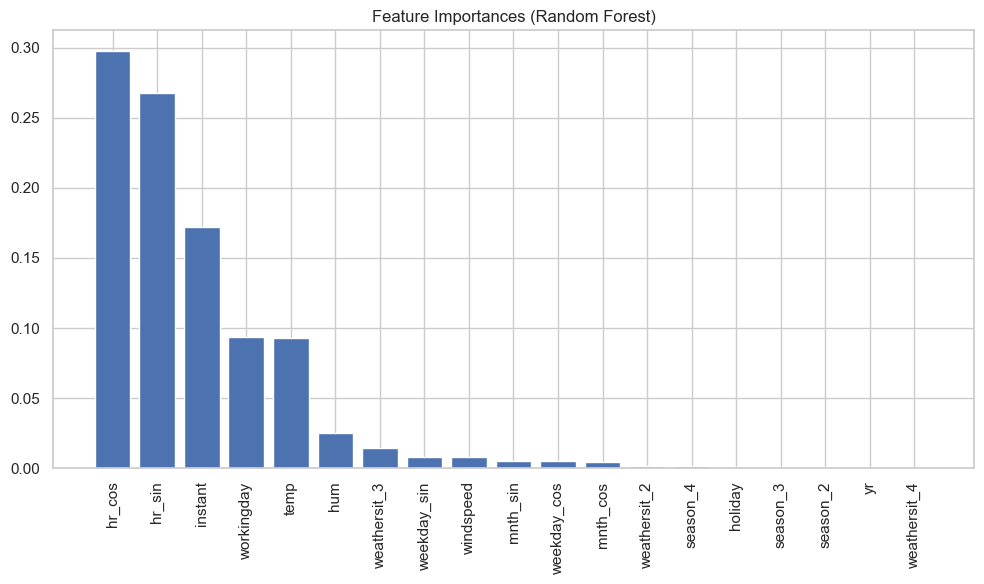

In [67]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

I did a feature importance plots that shows the most important predictors fro bike rentals and as you clearly see these are hr_cos and hr_sin. The instant feature has high importance. There are also other features like workingday, temp and hum which suggest that both calender and weather related variables play a huge role in prediciting the rental of bikes.

TASK 6

In [68]:
X_train = train_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_train = train_df['cnt']
X_val = val_df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y_val = val_df['cnt']

In [70]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)

In [71]:
mse_gb = mean_squared_error(y_val, y_pred_gb)
mae_gb = mean_absolute_error(y_val, y_pred_gb)
r2_gb = r2_score(y_val, y_pred_gb)

In [72]:
print("Gradient Boosting Regressor Performance on Validation Set:")
print(f"MSE: {mse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"R² Score: {r2_gb:.4f}")

Gradient Boosting Regressor Performance on Validation Set:
MSE: 4395.37
MAE: 45.85
R² Score: 0.8648


Although the R^2 score is high but it is still lower than the Random Forest, but higher than the Decision tree and Liner Regeression. This means the still the Random Forest is the best.

In [73]:
residuals = y_val - y_pred_gb

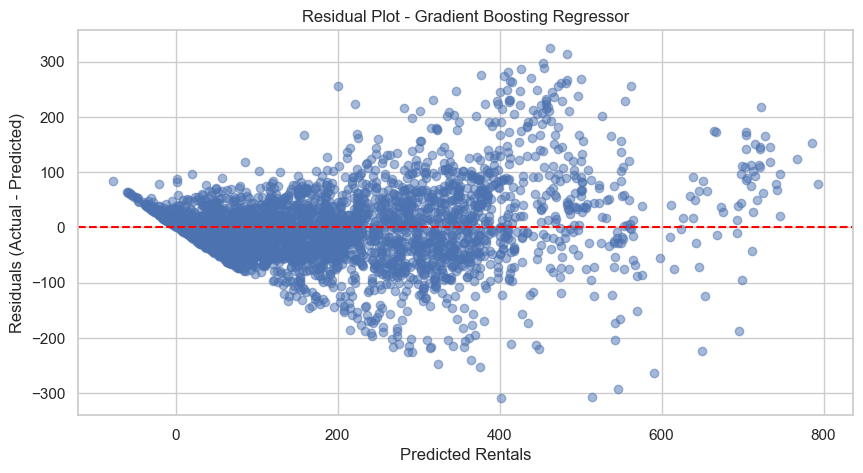

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_gb, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot - Gradient Boosting Regressor")
plt.xlabel("Predicted Rentals")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

I visualized the residuals and it showed a generally random scatter around zero which means the the model captured it well. However, there is a slight funnel shape which means increasing variance at higher rental predictions this could lead to overfitting or high variance.